<a href="https://colab.research.google.com/github/yessoto1/TrabajoPractico/blob/main/TrabajoPractico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación Trabajo práctico

Este trabajo fue iniciado en el curso de Minería de datos.
El dataset fue obtenido del siguiente link: https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies?resource=download 
El archivo que utilizaremos es: titles.csv
Este conjunto de datos se creó para enumerar todos los programas disponibles en la transmisión de Netflix y analizar los datos para encontrar datos interesantes. Estos datos se adquirieron en julio de 2022 y contienen datos disponibles en los Estados Unidos.



## Audiencia

Esta presentación va dirigida al profesor.

## Objetivo

Este trabajo tiene como objetivo representar mediante gráficos el crecimiento o decrecimiento de producción de series y películas en Estados Unidos a lo largo de los años.


# Preparación de los datos

Leemos el fichero de fuente de datos, que previamente hemos descargado del siguiente enlace: [Link](https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies?resource=download)

In [20]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import io

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from google.colab import files
from datetime import datetime

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [21]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [3]:
# Elegir el archivo titles.csv que se descargó del link mencionado anteriormente:
df = upload_files()
df.head()


Saving titles.csv to titles.csv
User uploaded file "titles.csv" with length 2024580 bytes


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


Comprobamos los tipos y la cantidad de instacias que tenemos

In [30]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

(5806, 18)
id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
tipo_publico             object
cantidad                  int64
periodo                  object
dtype: object


De estos resultados, aprendemos que el conjunto de datos tiene **5806** filas y **15** columnas. 
También almacenamos las columnas numéricas y no numéricas en arreglos distintos que nos pueden ser de utilidad en algún caso más adelante.



# Columnas nuevas

In [5]:
#Añadimos una nueva columna: tipo_publico
def is_old_func1(row):
  if row['age_certification'] in ['TV-G','G']:
   return 'Para todos'
  if row['age_certification'] in ['TV-PG','PG']:
   return 'Supervisión de padres'
  if row['age_certification'] in ['TV-Y','TV-Y7']:
   return 'Para niños'
  if row['age_certification'] in ['TV-14','PG-13']:
   return 'Para adolescentes'
  if row['age_certification'] in ['R','NC-17','TV-MA']:
   return 'Para adultos'
  
df['tipo_publico'] = df.apply(is_old_func1, axis='columns')


In [6]:
#Añadimos una nueva columna: tipo_publico
def establecer_cantidad(row):
  return 1

df['cantidad'] = df.apply(establecer_cantidad, axis='columns')

In [7]:
#Añadimos una nueva columna: periodo
def is_old_func2(row):
  if row['release_year'] < 2000:
   return '<2000'
  if row['release_year'] >= 2000 and row['release_year'] < 2010:
   return '<2010'
  if row['release_year'] >= 2010 and row['release_year'] < 2020:
   return '<2020'
  if row['release_year'] >= 2020:
   return '>=2020'
df['periodo'] = df.apply(is_old_func2, axis='columns')

In [8]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,tipo_publico,cantidad,periodo
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,Para adultos,1,<2000
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2,Para adultos,1,<2000
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8,Supervisión de padres,1,<2000
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8,Para adultos,1,<2000
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7,Para adultos,1,<2000


# Gráficos

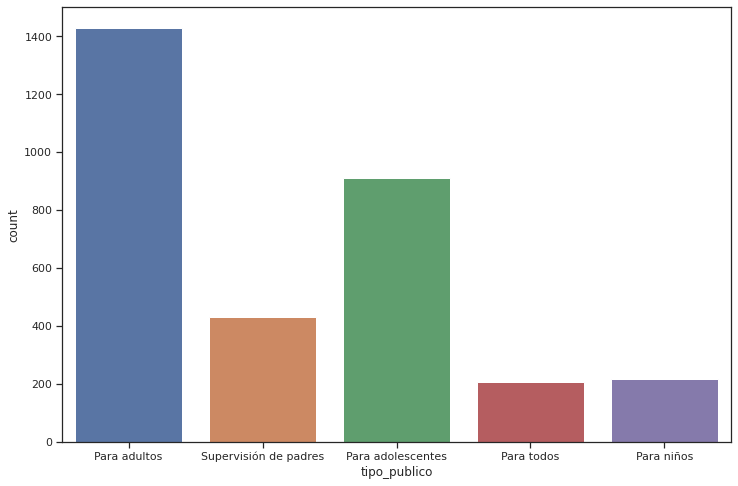

In [18]:
#Distribución de las clases
sns.countplot(x="tipo_publico", data=df)

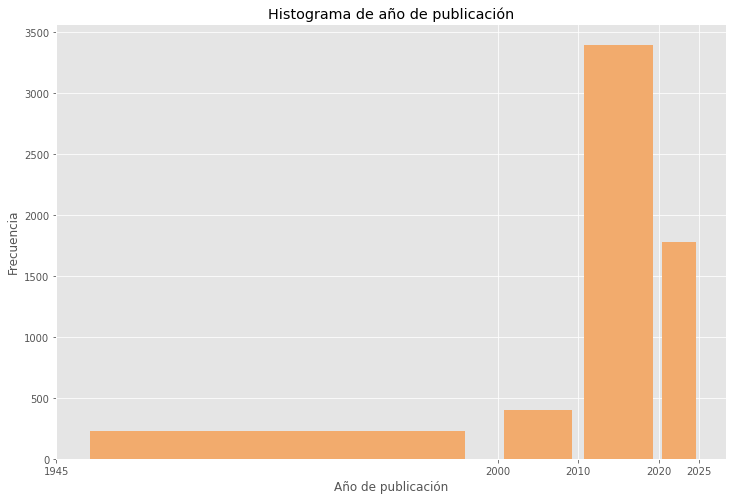

In [10]:
intervalos1 = [1945, 2000, 2010, 2020, 2025]

import matplotlib.pyplot as plot

plot.hist(x=df['release_year'], bins=intervalos1,
          color='#F2AB6D', rwidth=0.85,)
plot.title('Histograma de año de publicación')
plot.xlabel('Año de publicación')
plot.ylabel('Frecuencia')
plot.xticks(intervalos1)

plot.show() #dibujamos el histograma

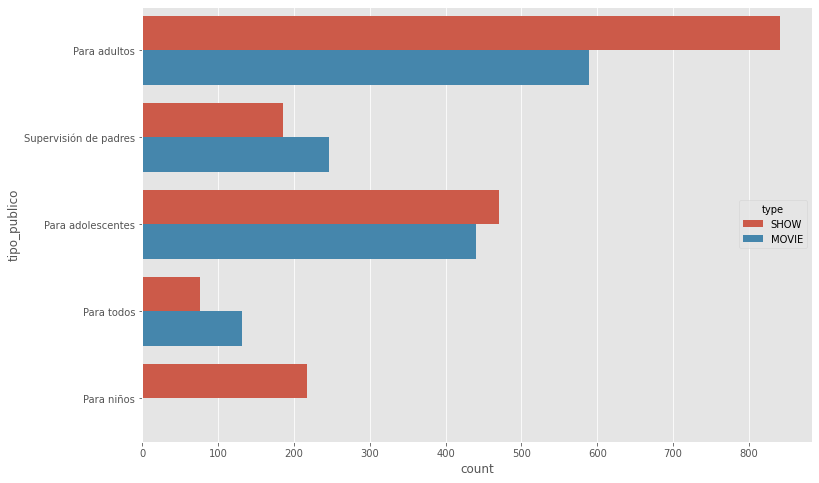

In [11]:
sns.countplot(y ="tipo_publico",
              hue = "type", data = df)
 
plot.show()

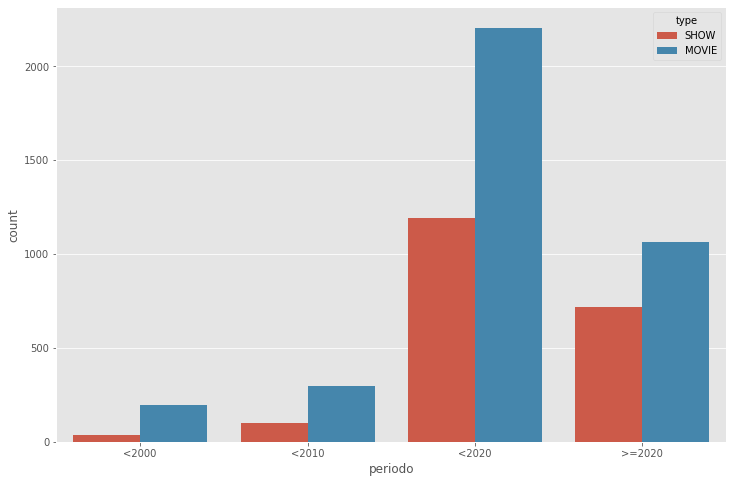

In [12]:
import seaborn as sns
import matplotlib.pyplot as plot

sns.countplot(x ="periodo",
              hue = "type", data = df)
 
plot.show()

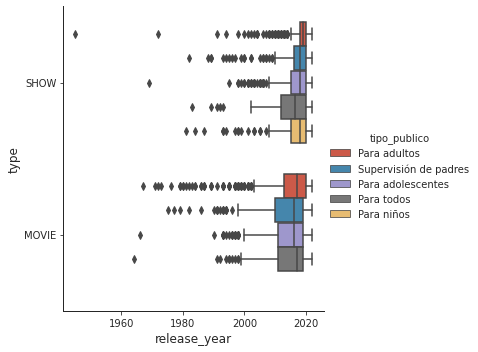

In [13]:
#BoxPlot de la edad por sexo y clase
with sns.axes_style(style='ticks'):
 ax = sns.catplot(y="type", x="release_year", hue="tipo_publico" ,
data=df, kind="box")

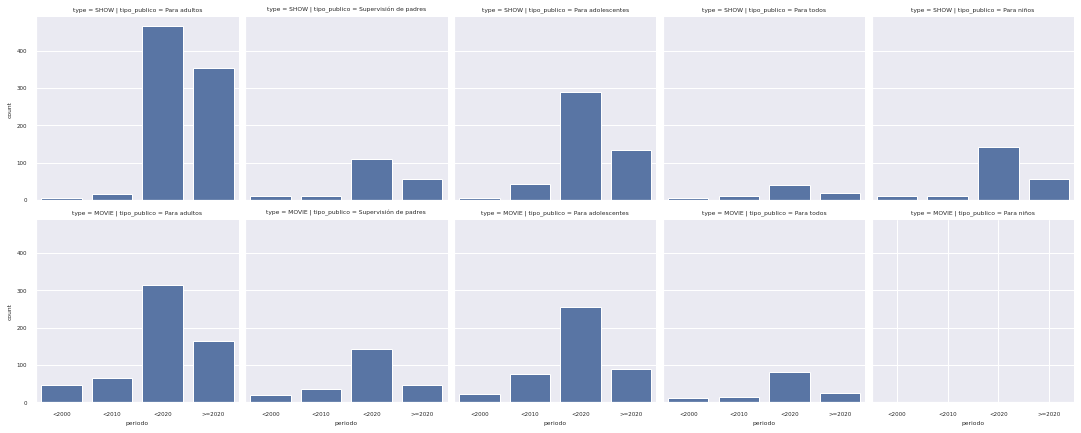

In [14]:
#Cambiamos el font
sns.set(font_scale=0.5)
#FacetGrid - Construir una matriz de gráficos
g = sns.FacetGrid(df, row='type', col='tipo_publico')
g.map(sns.countplot, "periodo", order=['<2000','<2010','<2020','>=2020'])

plt.show()


DF

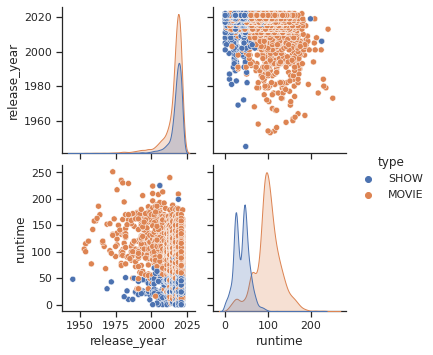

In [15]:
#Establece el estilo estético de las tramas
sns.set(style="ticks")
sns.pairplot(df[['release_year','runtime','tipo_publico','type']], hue="type")

In [17]:
output = pd.DataFrame({ 'type': df['type'], 
                       'periodo': df['periodo'],
                       'release_year': df['release_year'],
                       'runtime': df['runtime'],
                       'tipo_publico': df['tipo_publico']})


from google.colab import files

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result.csv')

output.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,type,periodo,release_year,runtime,tipo_publico
0,SHOW,<2000,1945,48,Para adultos
1,MOVIE,<2000,1976,113,Para adultos
2,MOVIE,<2000,1975,91,Supervisión de padres
3,MOVIE,<2000,1979,94,Para adultos
4,MOVIE,<2000,1973,133,Para adultos


In [ ]:
#Añadimos una nueva columna: periodo
def funcion_cuenta(row):
  return 1
df['cantidad'] = df.apply(funcion_cuenta, axis='columns')

In [ ]:
#Consulta con condiciones
new_df=df[['type','periodo','cantidad']].groupby(['periodo'
]).sum().reset_index()


In [ ]:
new_df.head()

,periodo,cantidad
0,<2000,230
1,<2010,397
2,<2020,3399
3,>=2020,1780


In [ ]:
#Consulta con condiciones
#new_df=df[['type','periodo','tipo_publico','cantidad']].groupby(['type', 'tipo_publico']).sum().reset_index()

In [ ]:
output = pd.DataFrame({                        'periodo': new_df['periodo'],
                       #'tipo_publico': new_df['tipo_publico'],
                       'cantidad': new_df['cantidad']
                       })


from google.colab import files

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result.csv')

output.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,periodo,cantidad
0,<2000,230
1,<2010,397
2,<2020,3399
3,>=2020,1780


In [41]:
#media de puntuación por año

a = df[['release_year','tmdb_score']].groupby(['release_year']).mean().reset_index()
a

,release_year,tmdb_score
0,1945,NaN
1,1953,5.800000
2,1954,7.100000
3,1956,5.900000
4,1958,7.400000
...,...,...
62,2018,6.752285
63,2019,6.955791
64,2020,6.977056
65,2021,6.938418


In [42]:
output = pd.DataFrame({                        'release_year': a['release_year'],
                       #'tipo_publico': new_df['tipo_publico'],
                       'tmdb_score': a['tmdb_score']
                       })


from google.colab import files

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

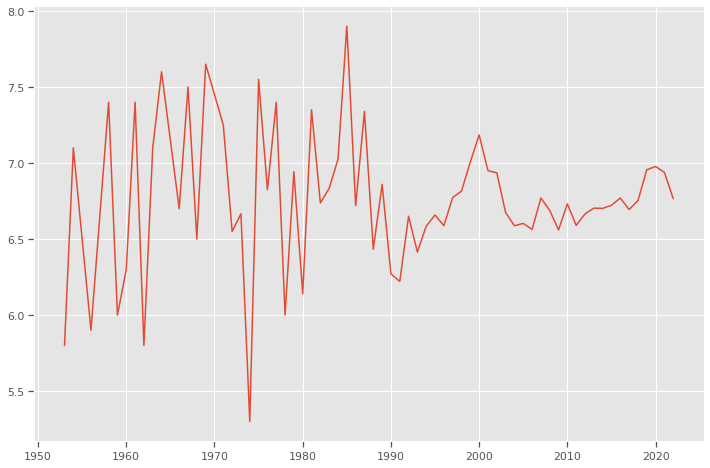

In [40]:
import matplotlib.pyplot as plt

x = a[['release_year']]
#Generamos valores en el eje Y de seno
y = a[['tmdb_score']]
fig, ax = plt.subplots()
#Creamos la Grafica
ax.plot(x, y)
plt.savefig('grafica_lineal.png')
plt.show()